## Plot multiple DBSCAN results

In [1]:
import os, glob, getpass, sys
import warnings
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table, join, vstack, hstack, Column, MaskedColumn, unique
from astropy.utils.exceptions import AstropyWarning

user = getpass.getuser()
sys.path.append('/Users/' + user + '/Dropbox/my_python_packages')
path = '../../'
from gaia.cluster_dbscan import Dbscan as Dbscan
from gaia.cluster_comparison_n import Comparison_n
import itertools

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/mpl_toolkits/axes_grid/__init__.py:12: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  obj_type='module')


In [2]:
# Read data ====================================
warnings.simplefilter('ignore', AstropyWarning)
data     = Table.read(path  + 'sample_gaia/gaia_sample_cleaned.vot',       format = 'votable')
data_scl = Table.read(path  + 'sample_clusters/cl_scale/scl_standard.vot', format = 'votable')
control  = Table.read(path  + 'sample_control/OPH___control_sample.vot',  format = 'votable') ; control.label = 'Control'

len(data_scl)

2300

In [3]:
# Run DBSCAN ====================================
mpts_s   = [100,    130,   160]
eps_s    = [0.373, 0.418, 0.455]
clusters = []
cl_len   = []

for i in range(len(eps_s)):
    eps  = eps_s[i]
    mpts = mpts_s[i]

    db_test = Dbscan()
    db_test.load(data = data, data_scl = data_scl.to_pandas())
    db_test.add_label()
    db_test.run_dbscan(eps=eps, mpts=mpts)
    db_test.get_clusters()
    cluster_out       = db_test.cl_array[0]
    cluster_out.label = 'mPts = ' + np.str(mpts) # This is useful for plots & histograms
    clusters.append(cluster_out)
    cl_len.append(len(cluster_out))
    
    cluster_out.write('cl_dbscan_mpts_' + np.str(mpts).zfill(3) + '.vot', format = 'votable', overwrite = True)    

eps = 0.37 -- clusters = 1 [492]
eps = 0.42 -- clusters = 1 [524]
eps = 0.46 -- clusters = 1 [552]


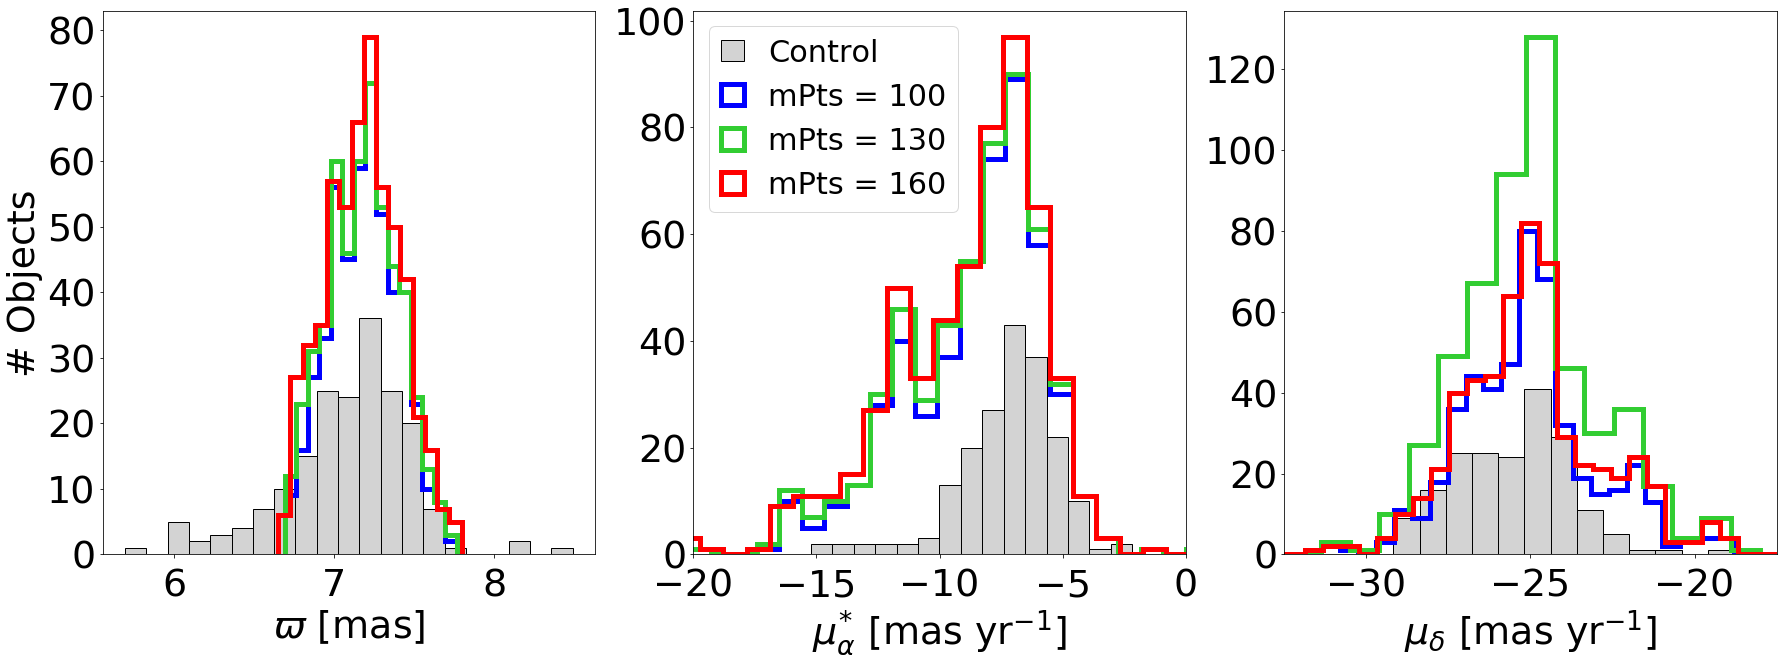

In [4]:
# Plot Results ==================================
colors = itertools.cycle(["blue", "limegreen", "red"])
test   = Comparison_n()
test.load_clusters(control=control, cluster_list=clusters)
hists = test.plot_3_hist(x1_bins=5, x2_bins=5, x3_bins=5, fig_nm='04_plot_multi_dbscan_results_ap0.pdf', x2lim=[-20,0], x3lim=[-32.5,-17.5], 
                 linewidth=5, colors=colors, ftsize = 38,ylabel_1 = '# Objects')

In [5]:
# Create Table to quickly inspect the outputs ====
output            = Table(data = [['DBSCAN'] *len(mpts_s)] + [mpts_s, eps_s, cl_len], names = ['Algorithm', 'mPts', 'Eps', 'Elements'])
output['Control'] = [len(join(cluster, test.control, keys='source_id')) for cluster in test.clusters]
output.write('output_dbscan.tex', format = 'ascii.latex', overwrite = True)
output

Algorithm,mPts,Eps,Elements,Control
str6,int64,float64,int64,int64
DBSCAN,100,0.373,492,155
DBSCAN,130,0.418,524,156
DBSCAN,160,0.455,552,158


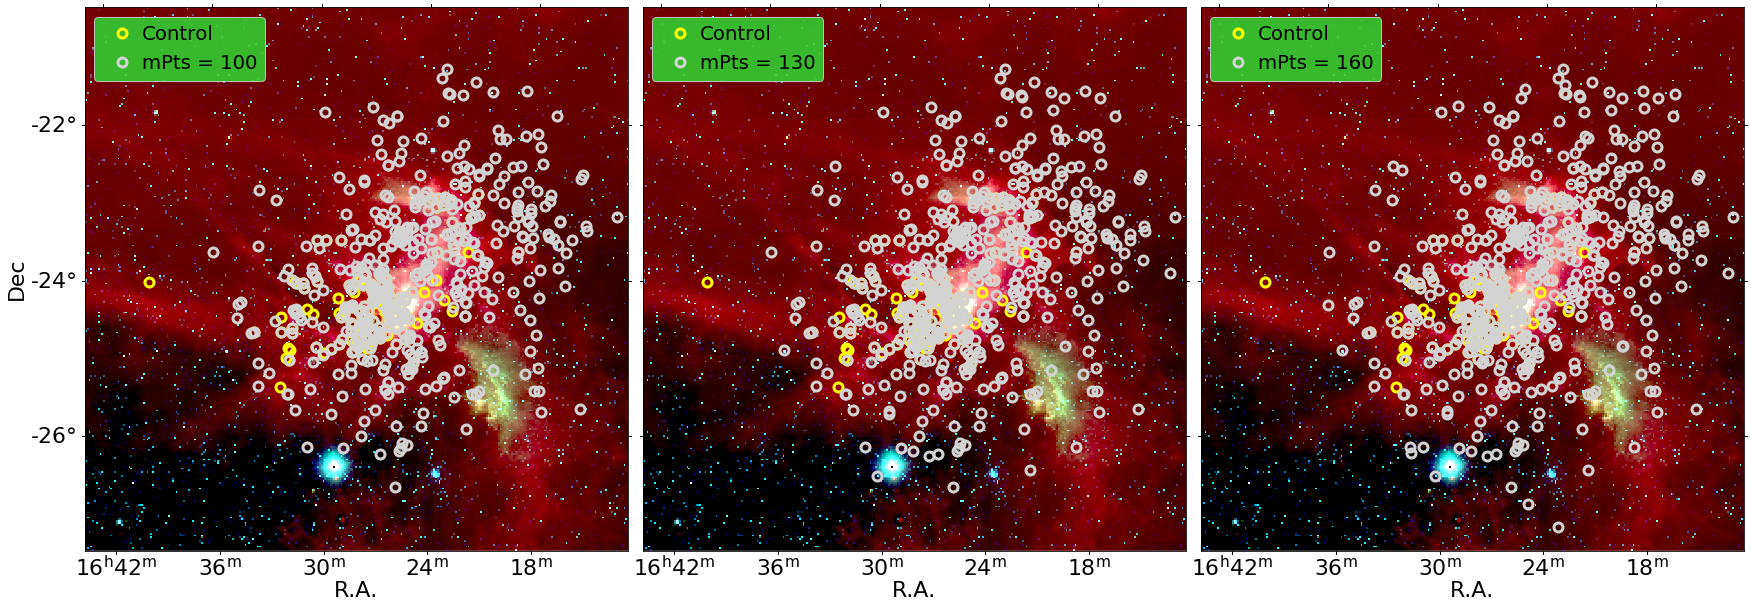

In [6]:
# Plot Wise ====================================
test.read_wise_fits(path + 'sample_control/wise_RGB_img.fits')
test.plot_wise_img_3(figname='04_plot_multi_dbscan_results_ap1.pdf', markersize=9, mew=3, mec_1 = 'yellow', mec_2='lightgrey', legend_color='limegreen')